In [55]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [56]:
print(train_images.shape, test_images.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [57]:
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

# Define AlexNet model
model = models.Sequential()

# Layer 1
model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))  # Use 'same' padding to avoid dimension issues

# Layer 2
model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

# Layer 3
model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

# Layer 4
model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

# Layer 5
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

# Flatten
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 6, 6, 96)          34944     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 3, 3, 96)         0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 3, 3, 256)         614656    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 2, 2, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 2, 2, 384)         885120    
                                                                 
 conv2d_35 (Conv2D)          (None, 2, 2, 384)        

In [9]:
# Choose a single test sample
sample_index = 0
single_test_image = np.expand_dims(test_images[sample_index], axis=0)
single_test_label = np.expand_dims(test_labels[sample_index], axis=0)



1/1 [==============================] - 0s 96ms/step


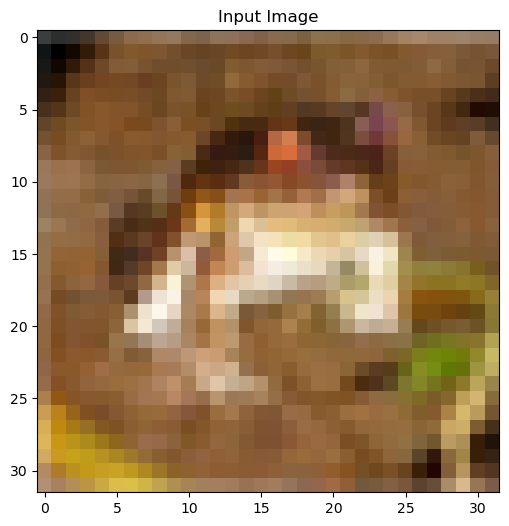

In [59]:
# Select a specific layer for visualization
layer_name = 'conv2d_32'
layer = model.get_layer(name=layer_name)
filter_index = 0  # You can change this to visualize different filters

# Create a sub-model to get the output of the selected layer
activation_model = models.Model(inputs=model.inputs, outputs=layer.output)

# Load an example image from CIFAR-10
img = train_images[0:1]

# Get the activation maps for the selected layer
activations = activation_model.predict(img)

# Visualize the input image
plt.figure(figsize=(6, 6))
plt.imshow(img[0])
plt.title('Input Image')
plt.show()

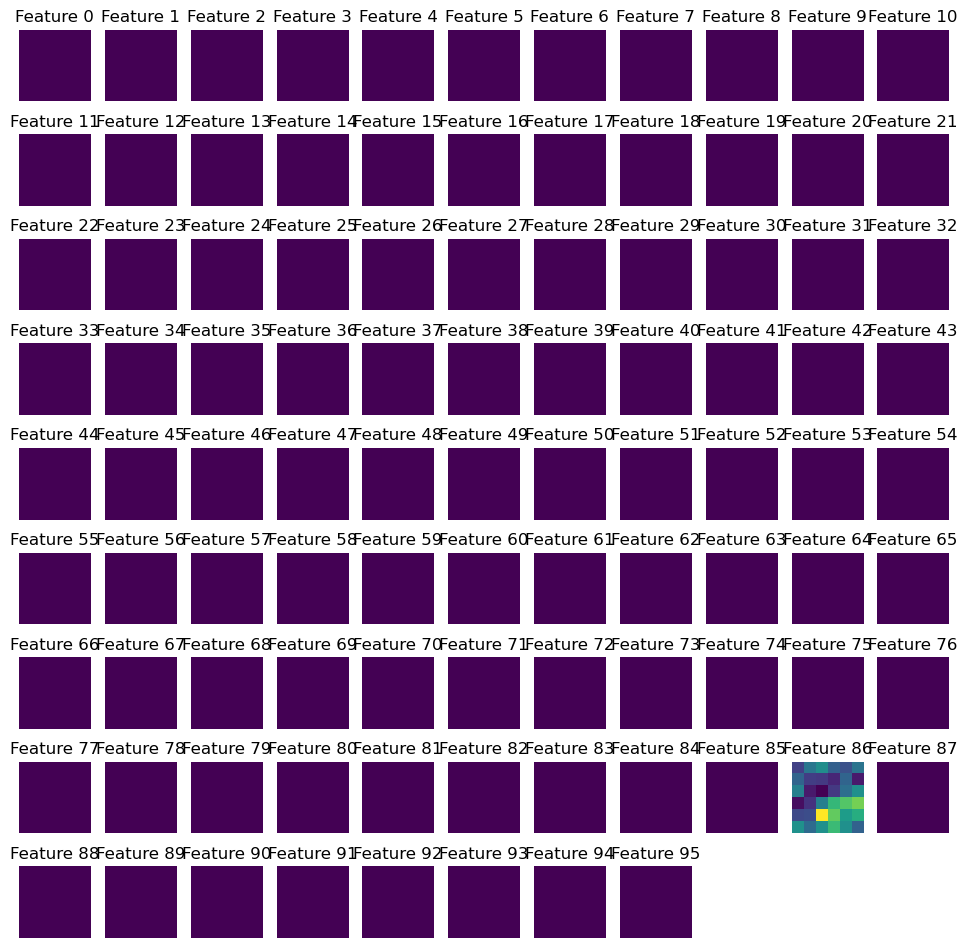

In [79]:
# Visualize the feature map
num_feature_maps = activations.shape[-1]
rows = int(np.sqrt(num_feature_maps))
cols = int(np.ceil(num_feature_maps / rows))

plt.figure(figsize=(12, 12))
for i in range(num_feature_maps):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(activations[0, :, :, i])  # Change the colormap here
    plt.axis('off')
    plt.title(f'Feature {i}')
plt.show()

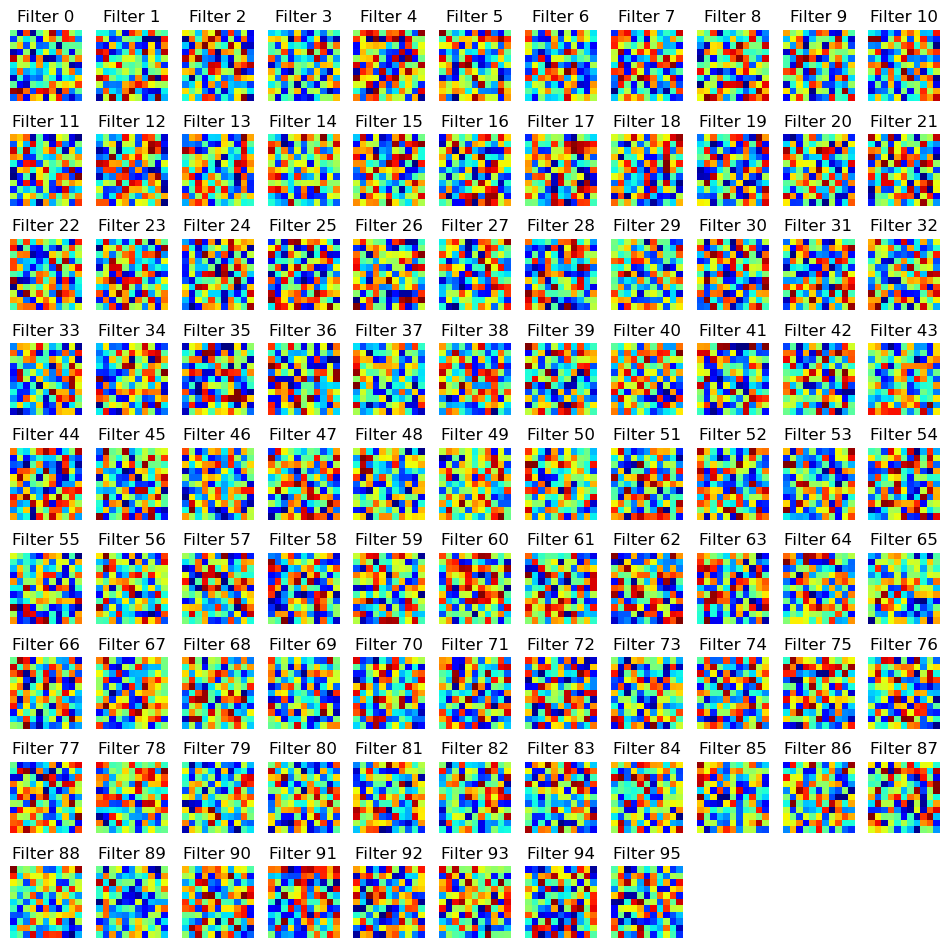

In [77]:
# Visualize all filters from the layer
filter_weights = layer.get_weights()[0]
num_filters = filter_weights.shape[-1]

# Determine the layout of the subplots
rows = int(np.sqrt(num_filters))
cols = int(np.ceil(num_filters / rows))

plt.figure(figsize=(12, 12))
for i in range(num_filters):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(filter_weights[:, :, 0, i], cmap='jet')  # Change the colormap here
    plt.axis('off')
    plt.title(f'Filter {i}')
plt.show()


In [82]:
# Visualize feature maps for each layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)



In [83]:
img = train_images[0:1]

# Get the activation maps for the selected layer
activations = activation_model.predict(img)

layer_names = [layer.name for layer in model.layers]

for layer_name, layer_activation in zip(layer_names, activations):
    print(layer_name, " ", layer_activation)


1/1 [==============================] - 0s 206ms/step
conv2d_32   [[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 

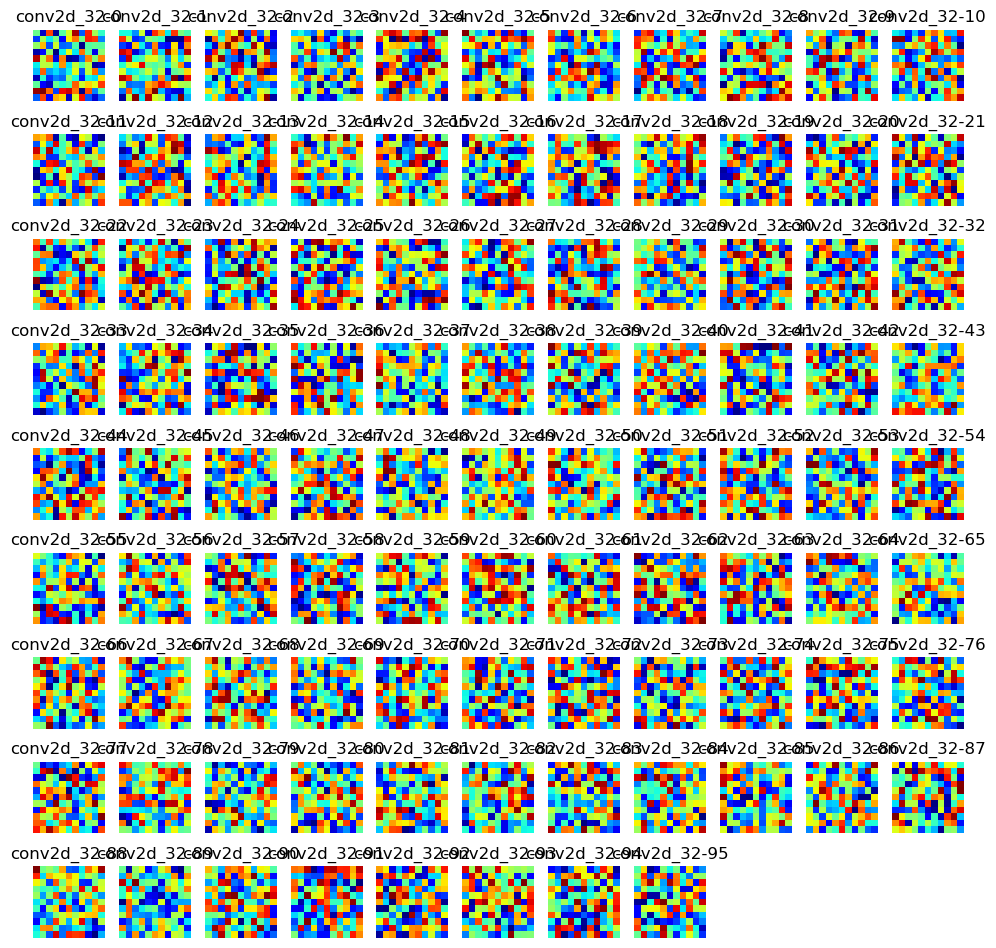

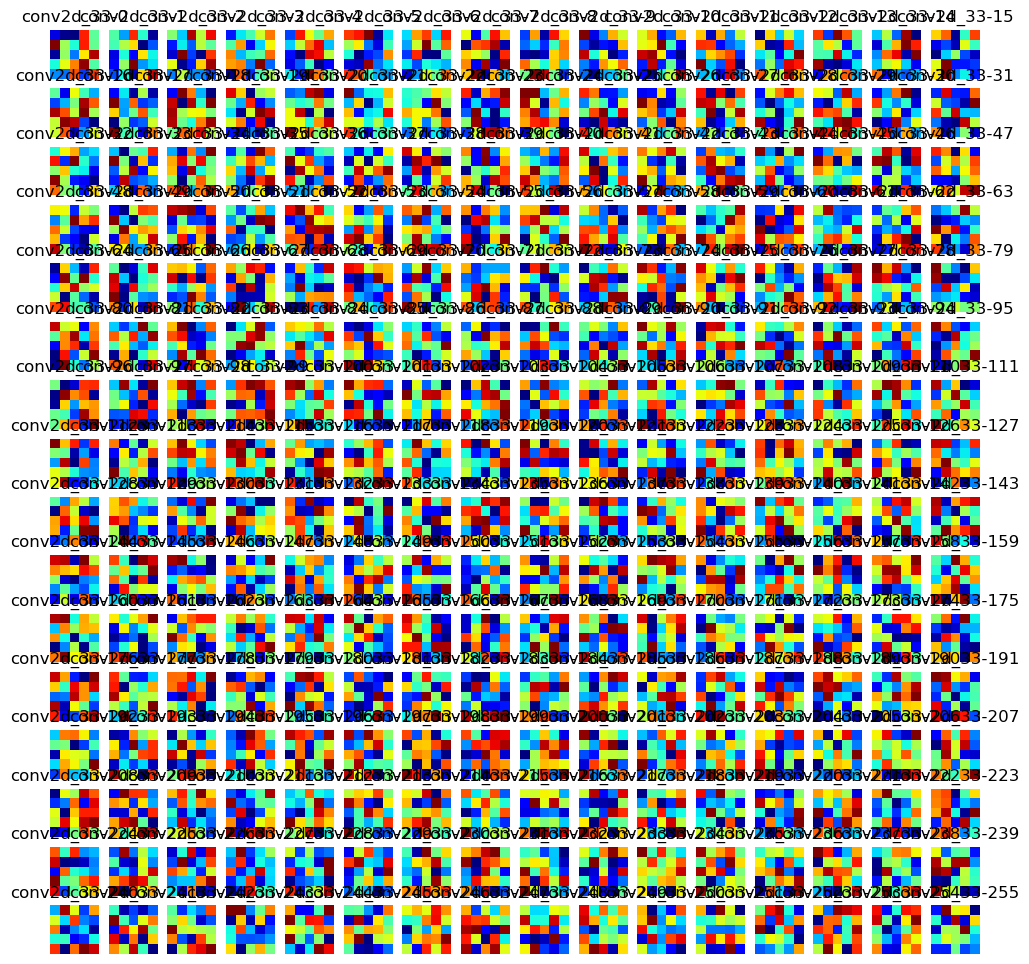

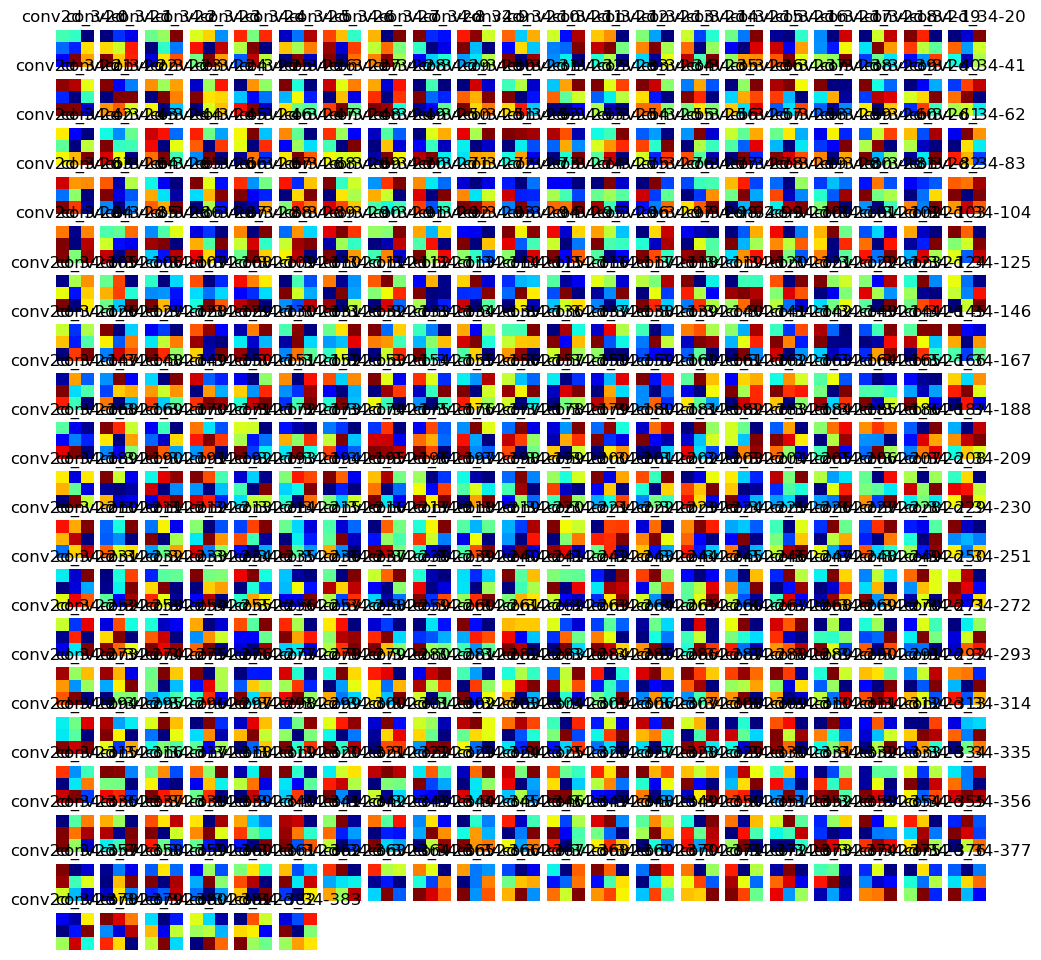

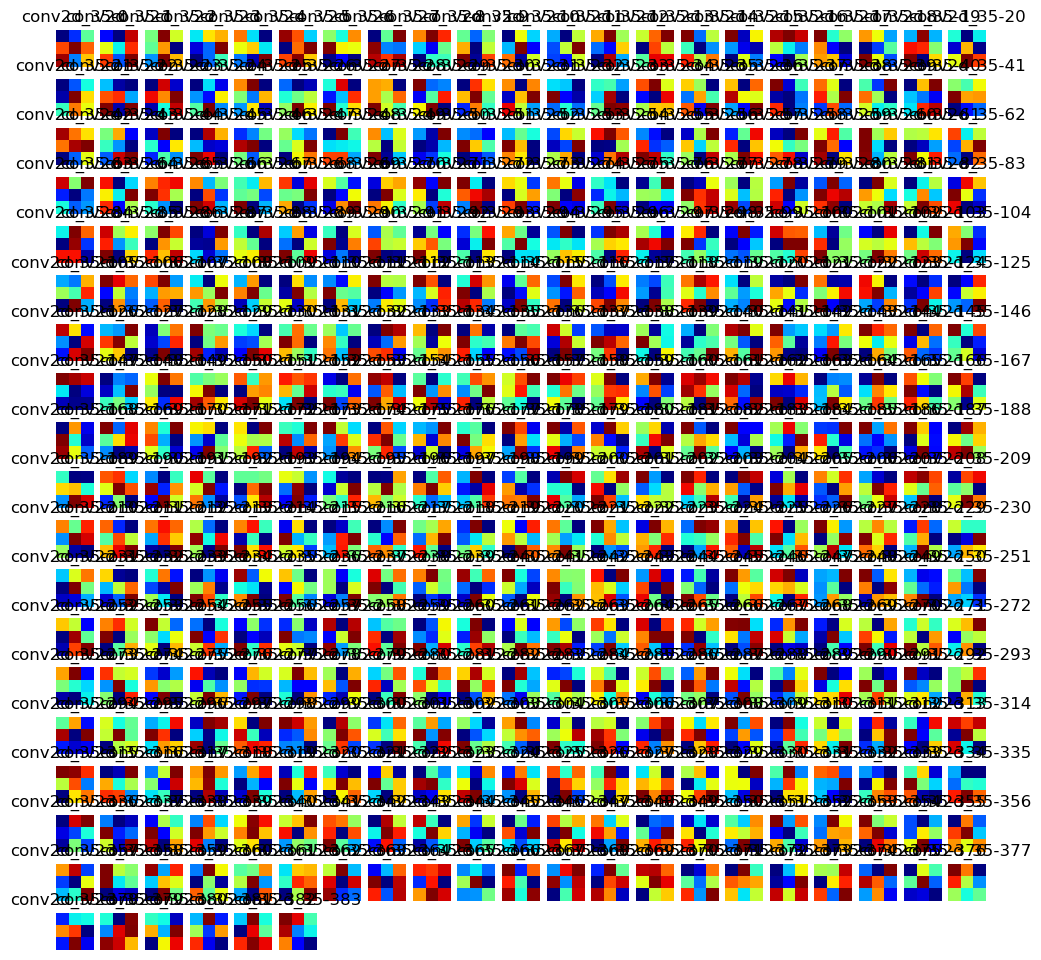

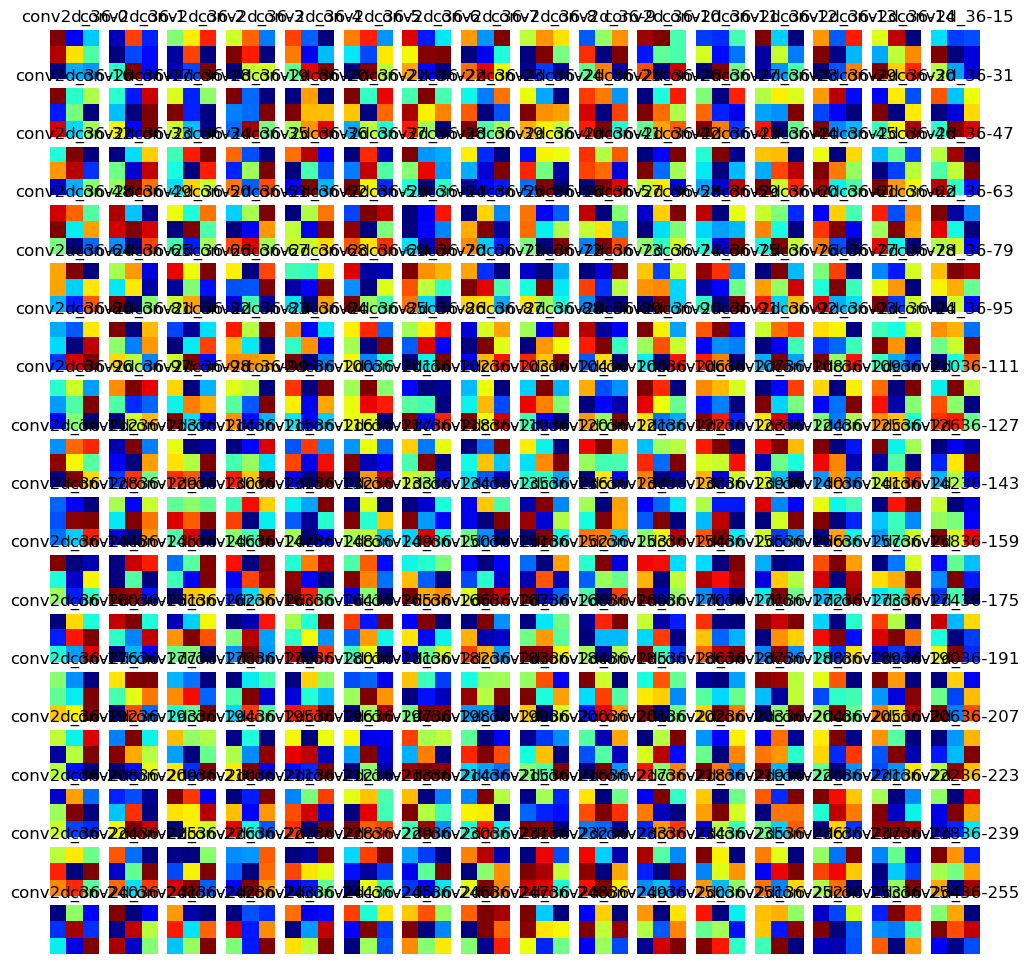

In [86]:
for layer in model.layers:
    if 'conv' in layer.name:
         # Visualize the filter
        filter_weights = layer.get_weights()[0]
        num_filters = filter_weights.shape[-1]

        rows = int(np.sqrt(num_filters))
        cols = int(np.ceil(num_filters / rows))

        plt.figure(figsize=(12, 12))
        for i in range(num_filters):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(filter_weights[:, :, 0, i], cmap='jet')  # Change the colormap here
            plt.axis('off')
            plt.title(f'{layer.name}-{i}')
        plt.show()

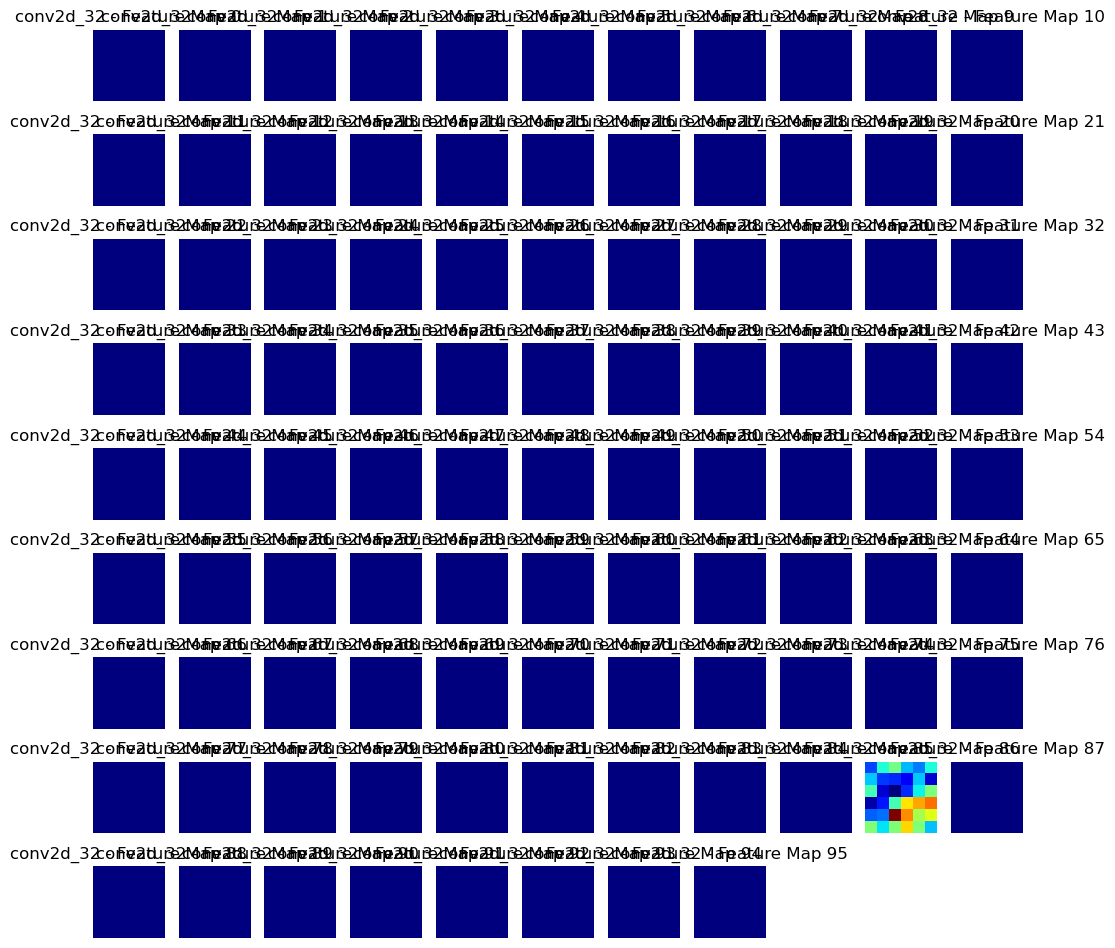

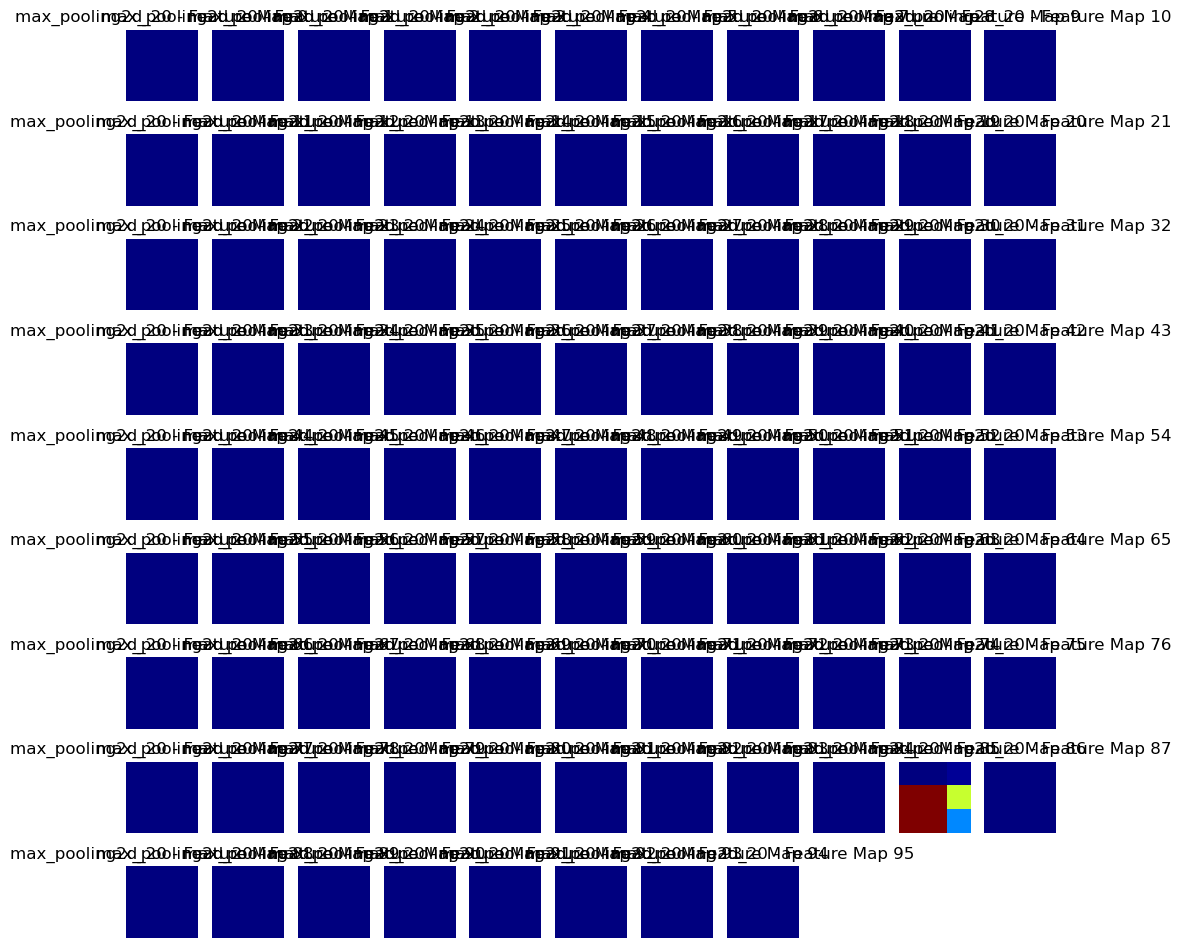

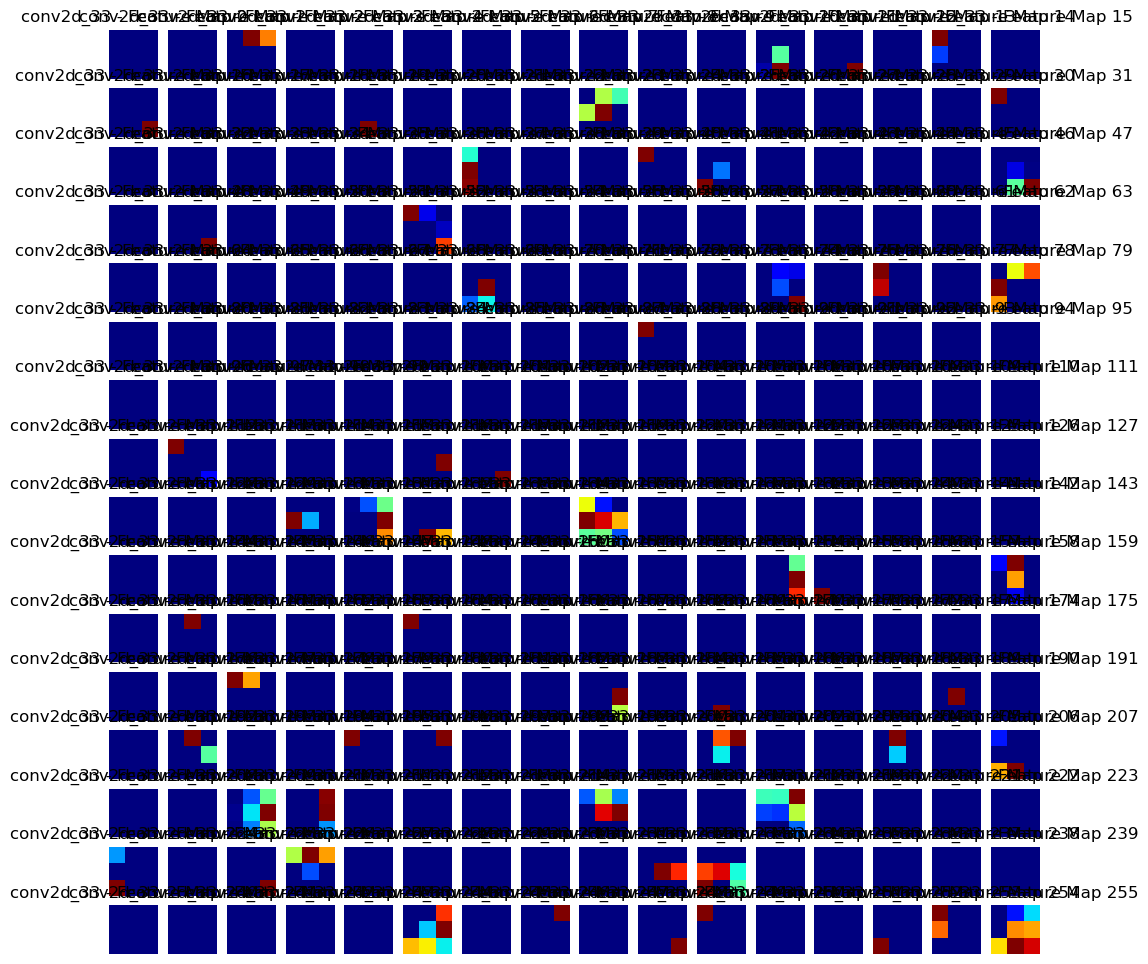

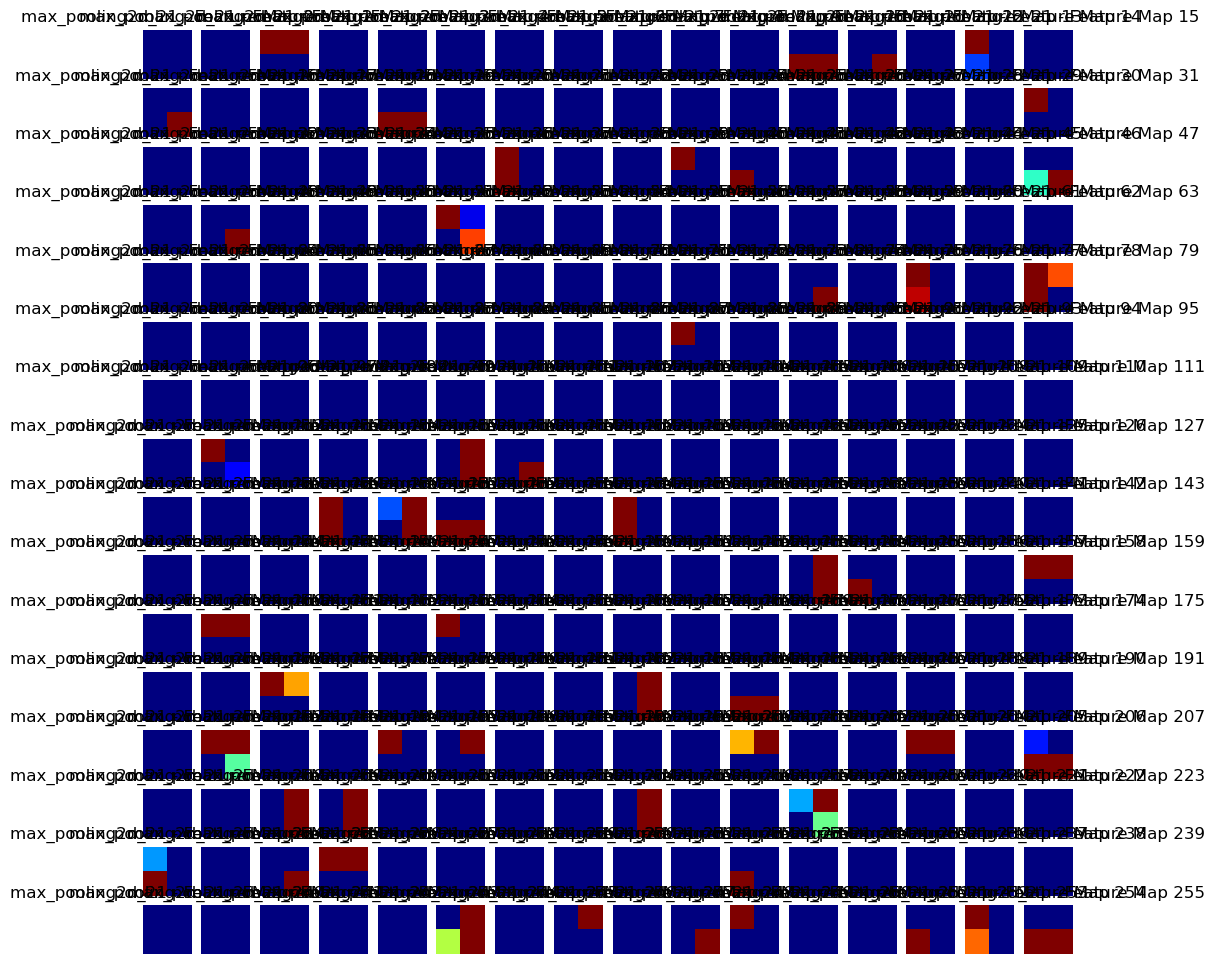

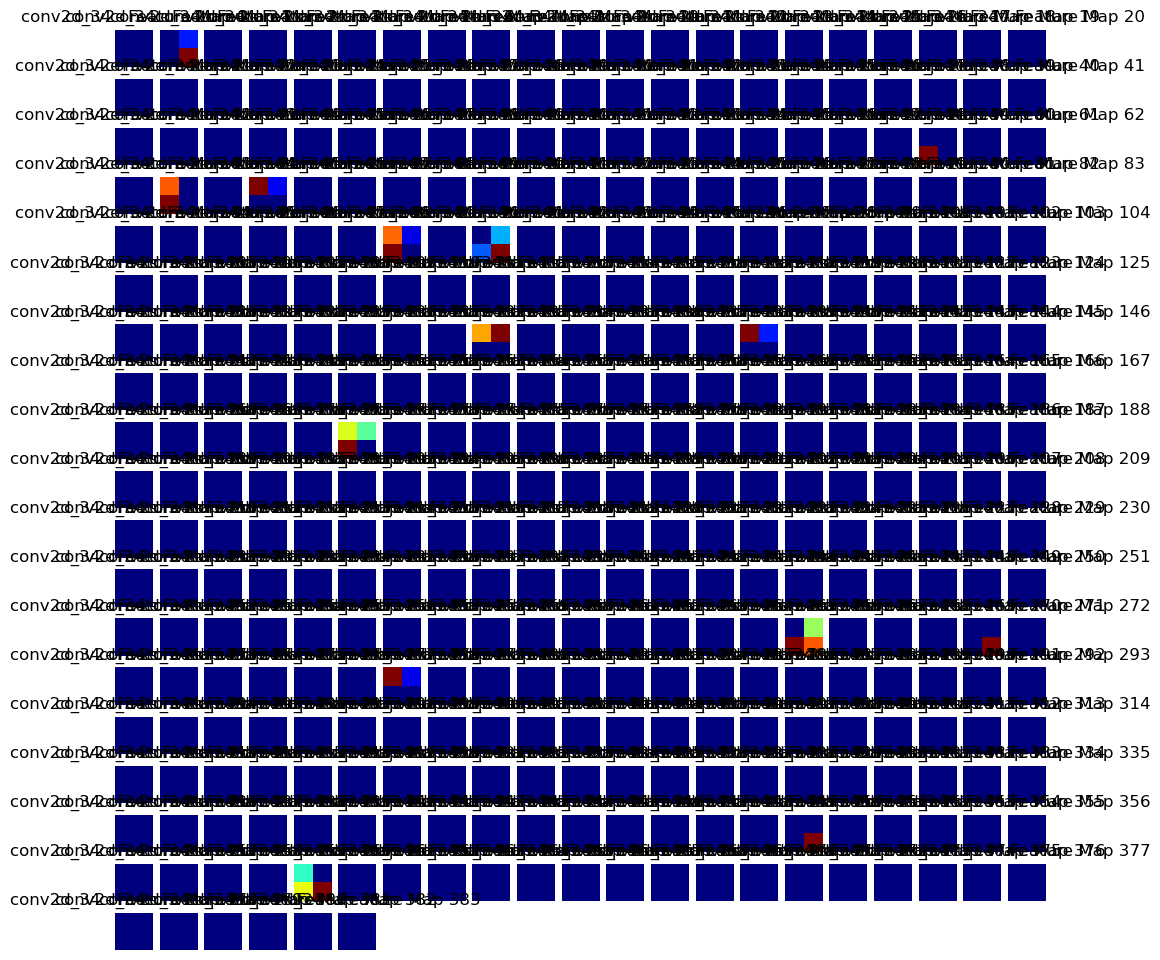

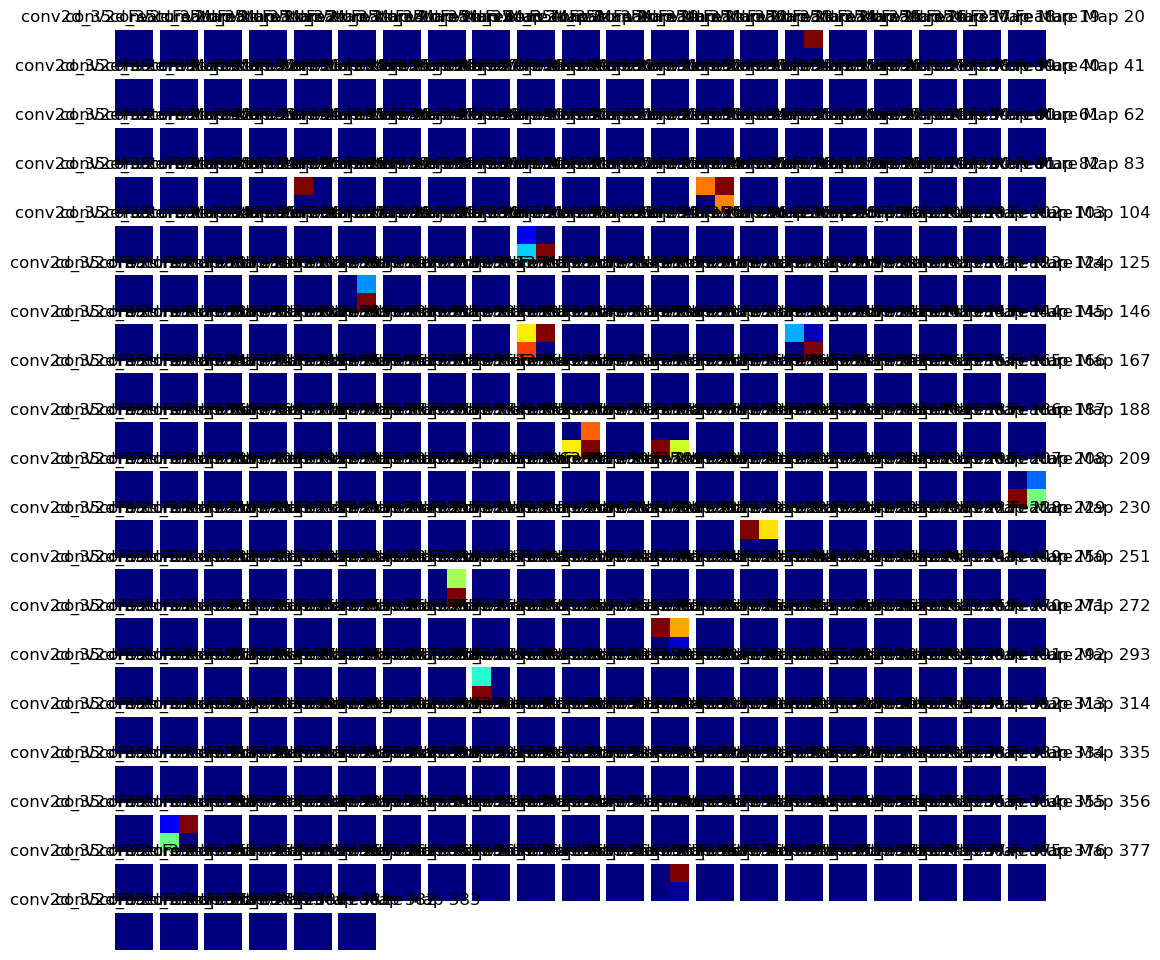

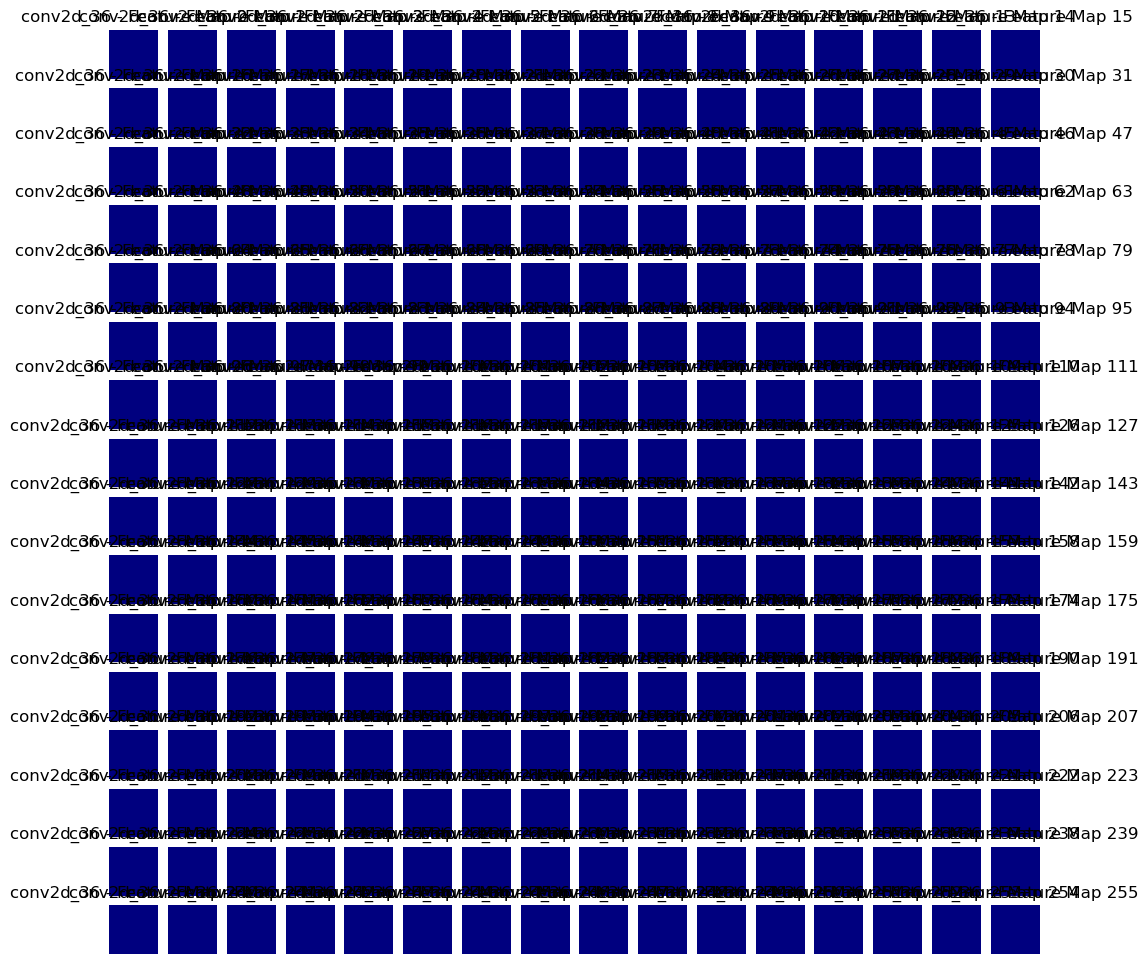

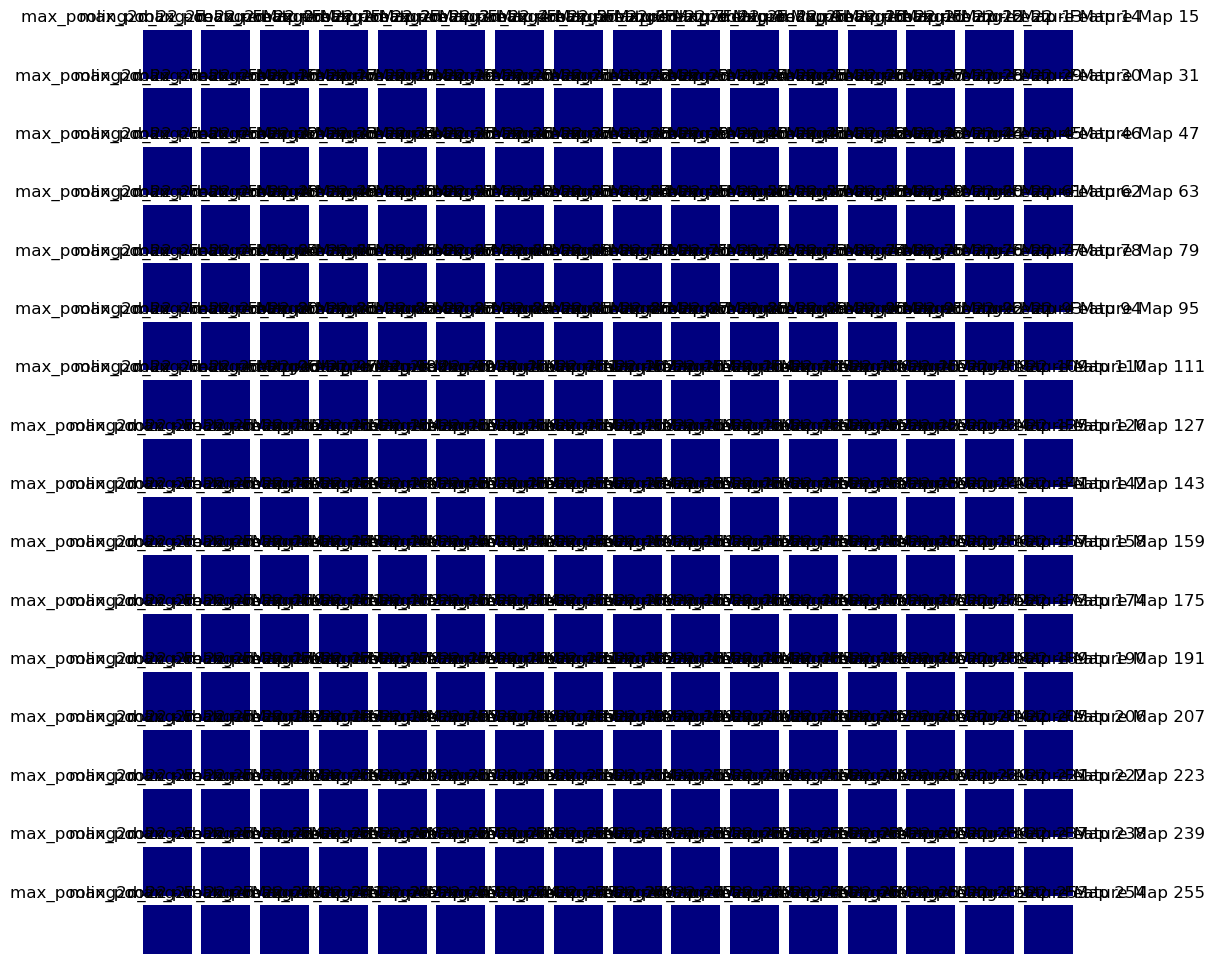

In [88]:
for layer_name, layer_activation in zip(layer_names, activations):
    if 'conv2d' in layer_name or 'max_pooling2d' in layer_name:
        # Visualize the feature maps
        num_feature_maps = layer_activation.shape[-1]
        rows = int(np.sqrt(num_feature_maps))
        cols = int(np.ceil(num_feature_maps / rows))

        plt.figure(figsize=(12, 12))
        for i in range(num_feature_maps):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(layer_activation[0, :, :, i], cmap='jet')  # Change the colormap here
            plt.axis('off')
            plt.title(f'{layer_name} - Feature Map {i}')
        plt.show()

In [10]:

# Test the model on the single test sample
predictions = model.predict(single_test_image)



1/1 [==============================] - 0s 287ms/step


Predicted Class: 1
True Class: 0
1/1 [==============================] - 0s 80ms/step


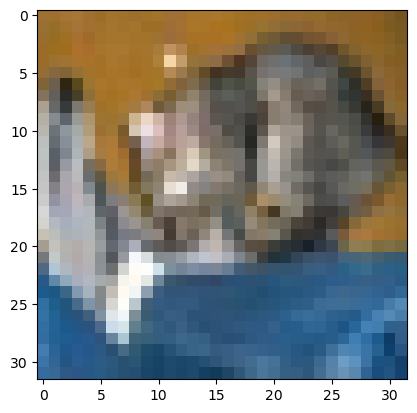

In [14]:
# Display the predicted class and true class
predicted_class = np.argmax(predictions)
true_class = np.argmax(single_test_label)
print(f'Predicted Class: {predicted_class}')
print(f'True Class: {true_class}')

# Save feature maps for the first convolutional layer
layer_name = 'conv2d_17'
intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(single_test_image)

# Save the feature maps as images
for i in range(intermediate_output.shape[3]):
    plt.imshow(intermediate_output[0, :, :, i], cmap='viridis')  # You can use other colormaps as well
    plt.savefig(f'feature_map_{layer_name}_{i}.png')

# Show the original image
plt.imshow(test_images[sample_index])
plt.show()

In [ ]:
# Choose a layer to visualize (you can choose any valid layer name)
layer_name = 'conv2d_17'
intermediate_layer_model = models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Get the feature map of the selected test image
intermediate_output = intermediate_layer_model.predict(single_test_image)

# Display the feature maps
row_size = 12
col_size = 8
filter_index = 2  # Change this to visualize different filters in the chosen layer

plt.figure(figsize=(55, 55))
for i in range(row_size * col_size):
    plt.subplot(row_size, col_size, i + 1)
    plt.imshow(intermediate_output[0, :, :, filter_index], cmap='viridis')
    filter_index += 1

plt.show()

1/1 [==============================] - 0s 85ms/step


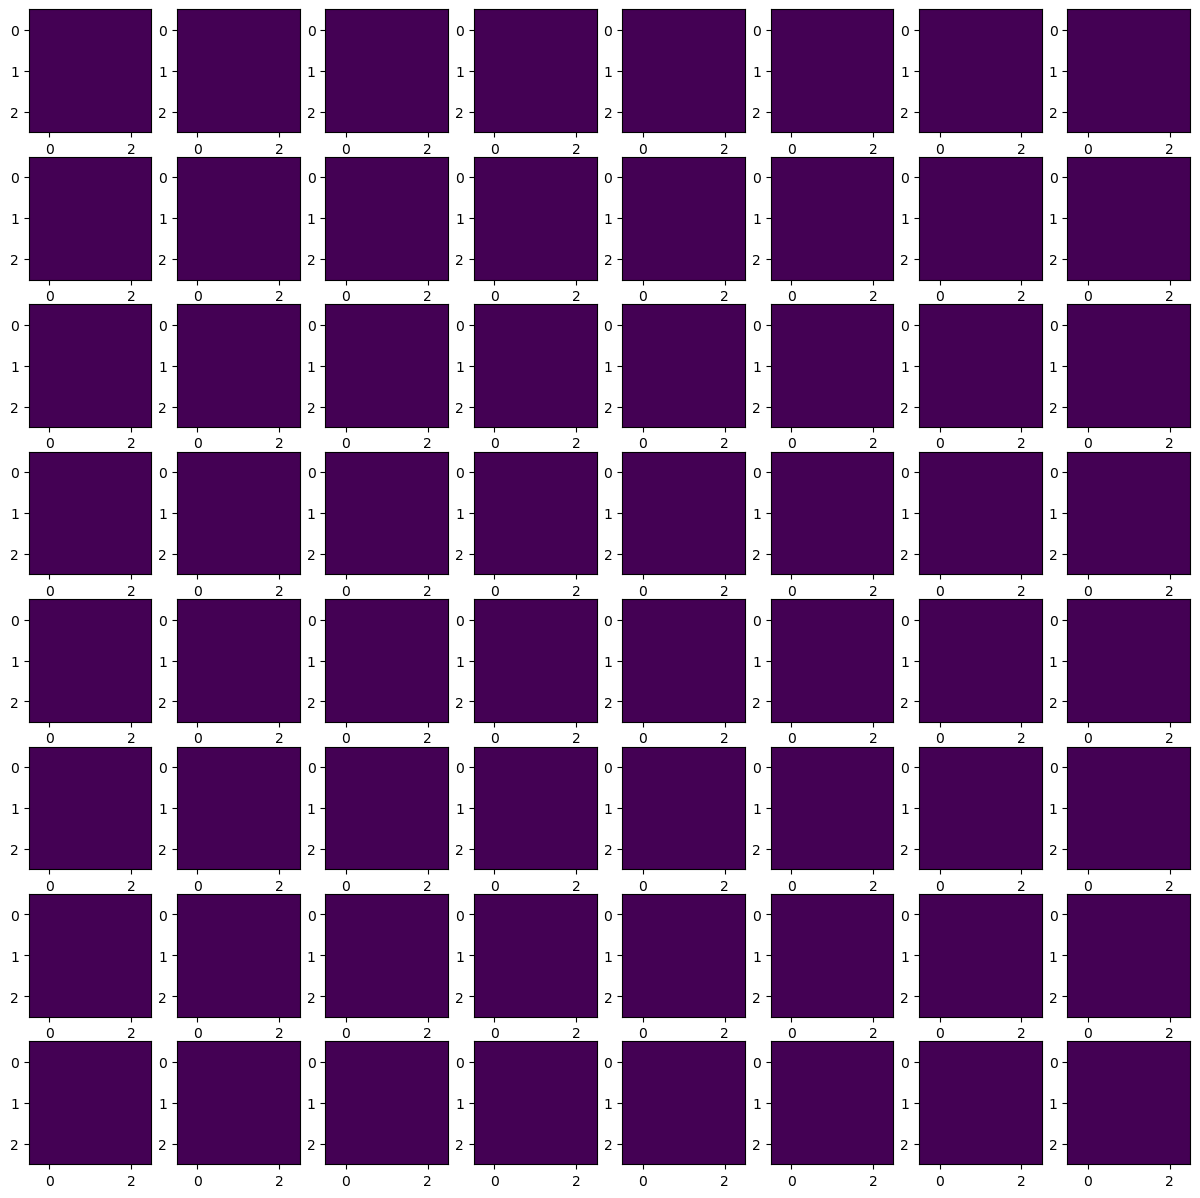

In [19]:
# Choose a layer to visualize (you can choose any valid layer name)
layer_name = 'max_pooling2d_11'
intermediate_layer_model = models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Get the feature map of the selected test image
intermediate_output = intermediate_layer_model.predict(single_test_image)

# Display the feature maps
row_size = 8
col_size = 8
filter_index = 0  # Change this to visualize different filters in the chosen layer

plt.figure(figsize=(15, 15))
for i in range(row_size * col_size):
    plt.subplot(row_size, col_size, i + 1)
    plt.imshow(intermediate_output[0, :, :, filter_index], cmap='viridis')
    filter_index += 1

plt.show()

1/1 [==============================] - 0s 92ms/step


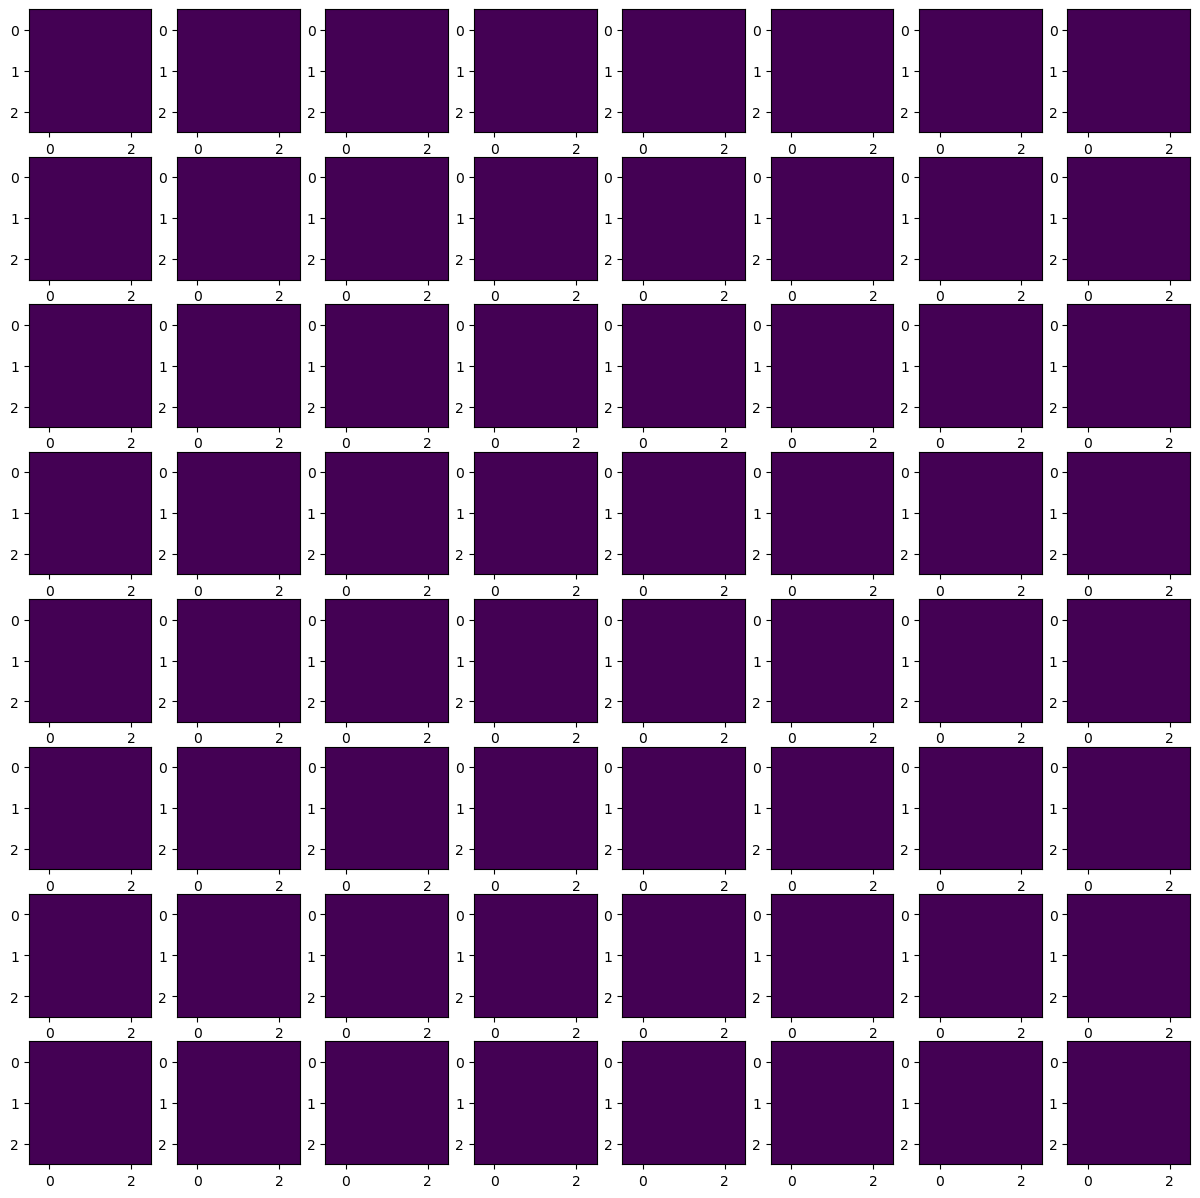

In [20]:
# Choose a layer to visualize (you can choose any valid layer name)
layer_name = 'conv2d_18'
intermediate_layer_model = models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Get the feature map of the selected test image
intermediate_output = intermediate_layer_model.predict(single_test_image)

# Display the feature maps
row_size = 8
col_size = 8
filter_index = 0  # Change this to visualize different filters in the chosen layer

plt.figure(figsize=(15, 15))
for i in range(row_size * col_size):
    plt.subplot(row_size, col_size, i + 1)
    plt.imshow(intermediate_output[0, :, :, filter_index], cmap='viridis')
    filter_index += 1

plt.show()

1/1 [==============================] - 0s 103ms/step


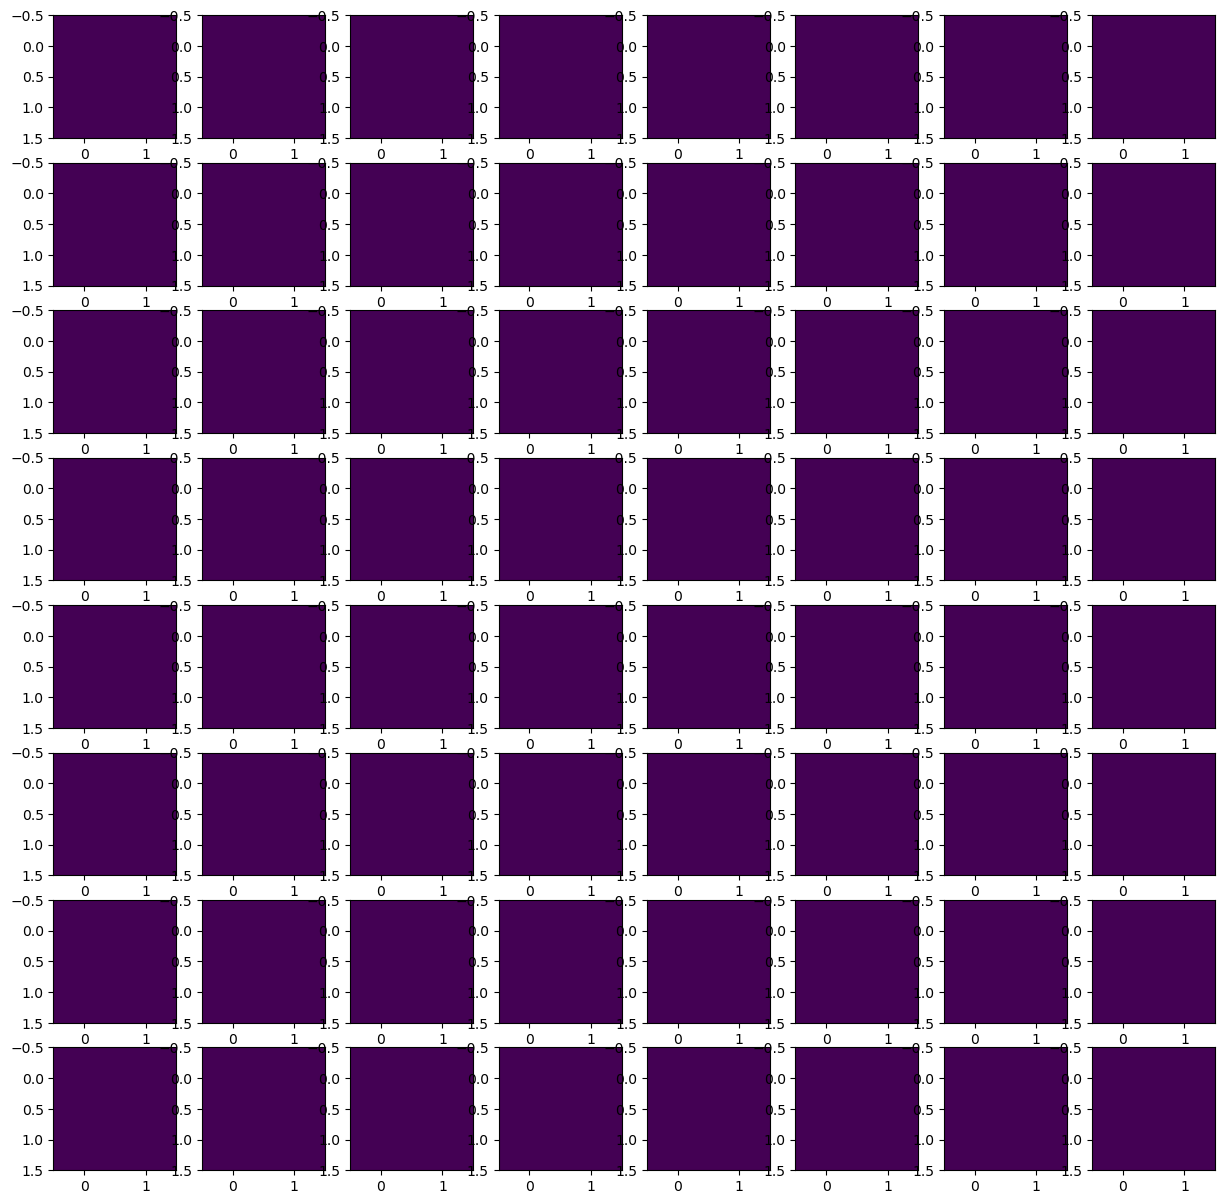

In [21]:
# Choose a layer to visualize (you can choose any valid layer name)
layer_name = 'max_pooling2d_12'
intermediate_layer_model = models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Get the feature map of the selected test image
intermediate_output = intermediate_layer_model.predict(single_test_image)

# Display the feature maps
row_size = 8
col_size = 8
filter_index = 0  # Change this to visualize different filters in the chosen layer

plt.figure(figsize=(15, 15))
for i in range(row_size * col_size):
    plt.subplot(row_size, col_size, i + 1)
    plt.imshow(intermediate_output[0, :, :, filter_index], cmap='viridis')
    filter_index += 1

plt.show()

1/1 [==============================] - 0s 177ms/step


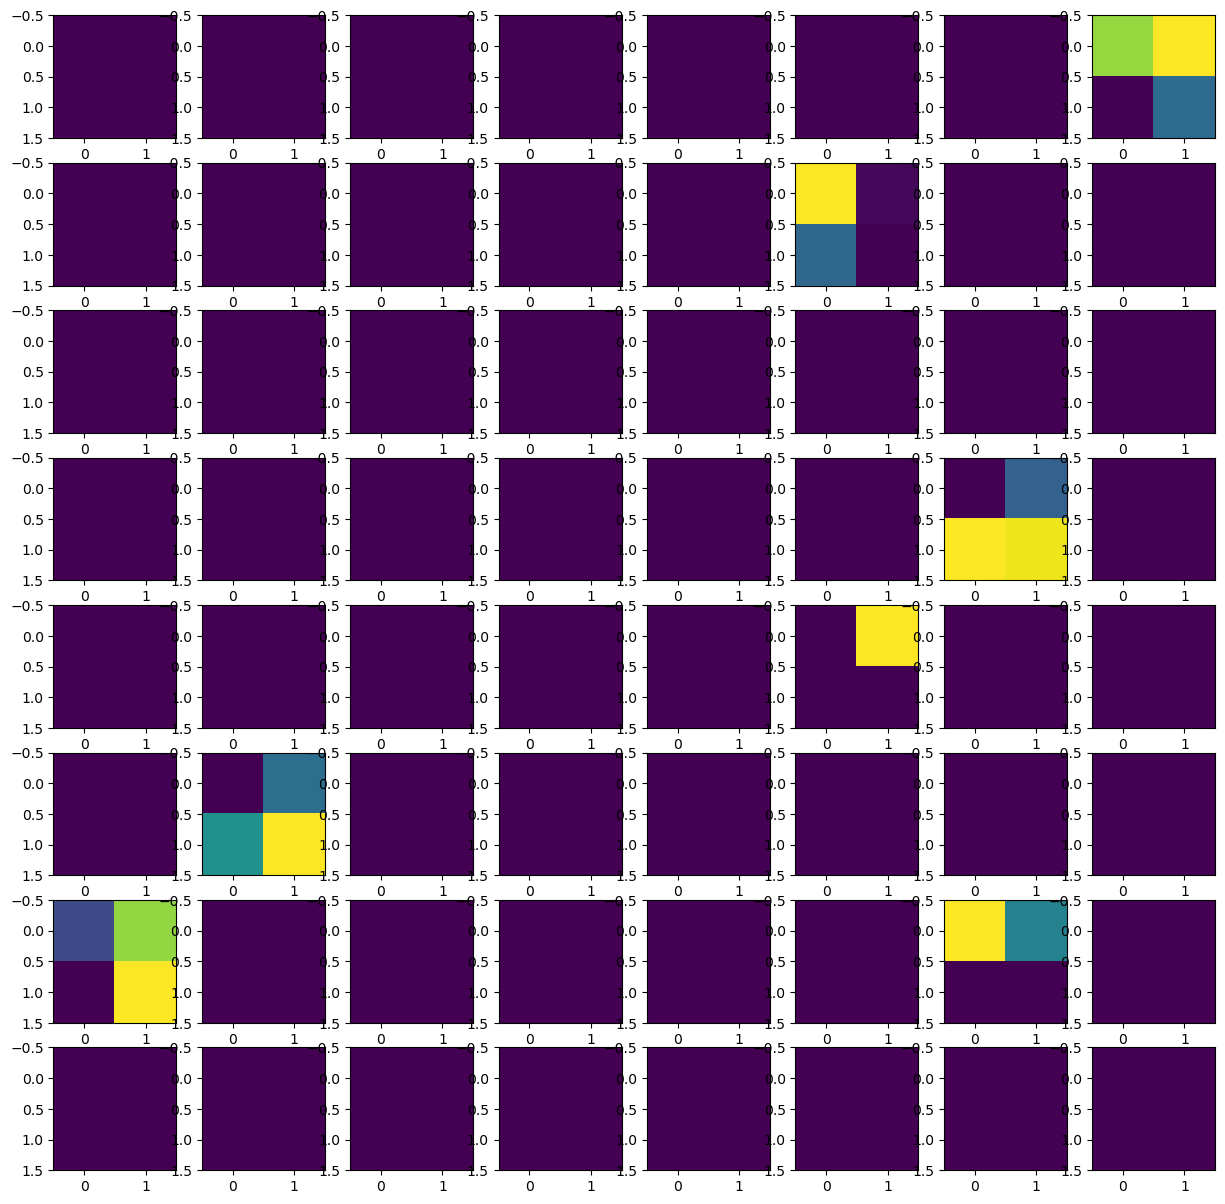

In [22]:
# Choose a layer to visualize (you can choose any valid layer name)
layer_name = 'conv2d_19'
intermediate_layer_model = models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Get the feature map of the selected test image
intermediate_output = intermediate_layer_model.predict(single_test_image)

# Display the feature maps
row_size = 8
col_size = 8
filter_index = 0  # Change this to visualize different filters in the chosen layer

plt.figure(figsize=(15, 15))
for i in range(row_size * col_size):
    plt.subplot(row_size, col_size, i + 1)
    plt.imshow(intermediate_output[0, :, :, filter_index], cmap='viridis')
    filter_index += 1

plt.show()

1/1 [==============================] - 0s 203ms/step


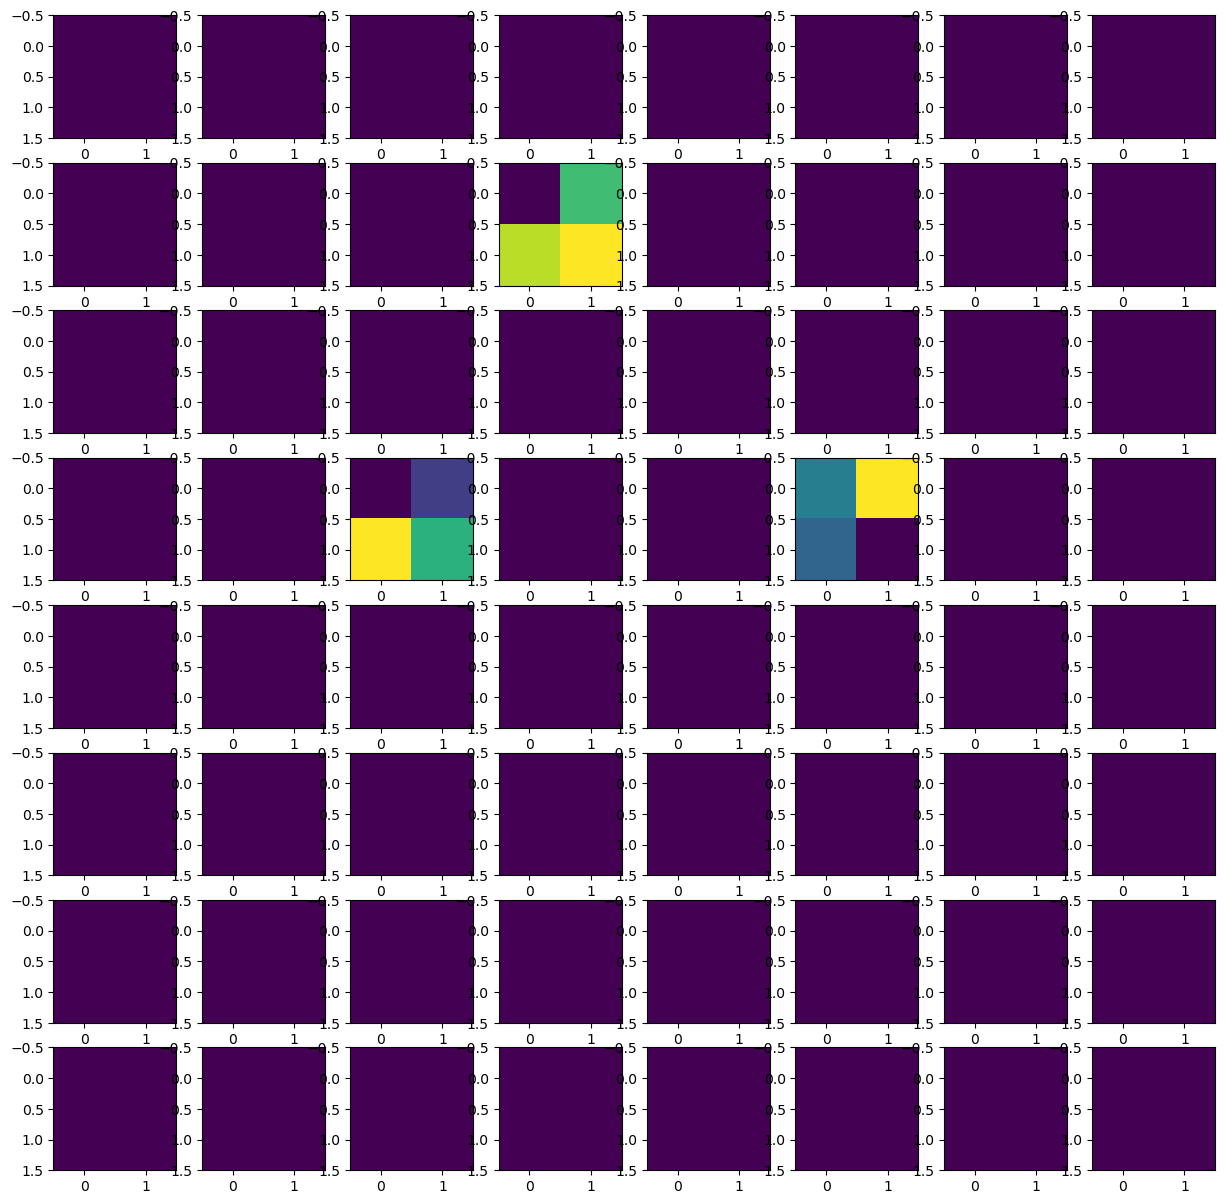

In [23]:
# Choose a layer to visualize (you can choose any valid layer name)
layer_name = 'conv2d_19'
intermediate_layer_model = models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Get the feature map of the selected test image
intermediate_output = intermediate_layer_model.predict(single_test_image)

# Display the feature maps
row_size = 8
col_size = 8
filter_index = 0  # Change this to visualize different filters in the chosen layer

plt.figure(figsize=(15, 15))
for i in range(row_size * col_size):
    plt.subplot(row_size, col_size, i + 1)
    plt.imshow(intermediate_output[0, :, :, filter_index], cmap='viridis')
    filter_index += 1

plt.show()

1/1 [==============================] - 0s 137ms/step


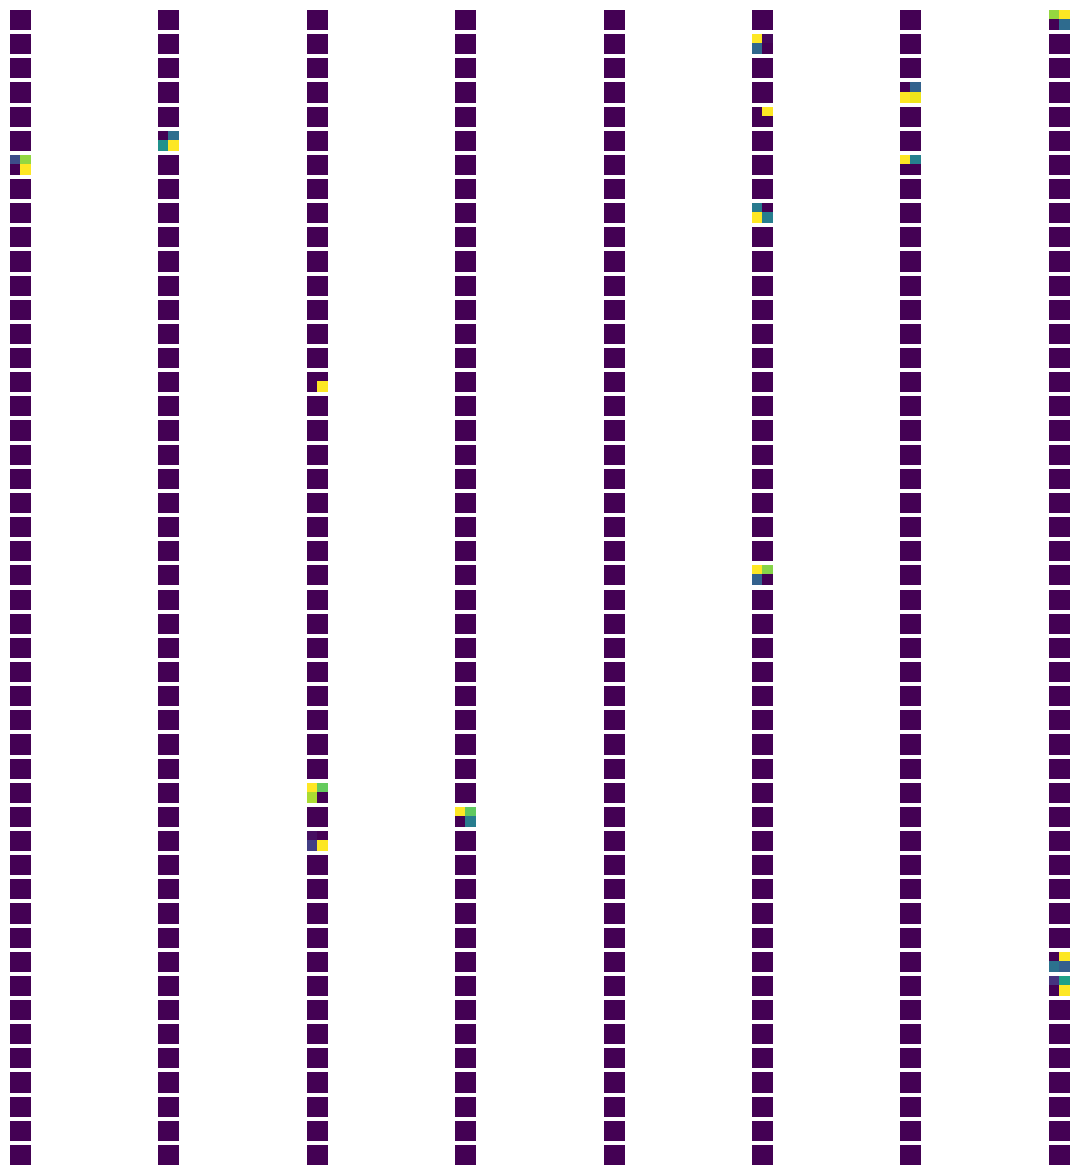

In [35]:
# Choose a layer to visualize (you can choose any valid layer name)
layer_name = 'conv2d_19'
intermediate_layer_model = models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Get the feature map of the selected test image
intermediate_output = intermediate_layer_model.predict(single_test_image)

# Plot all the feature maps
num_features = intermediate_output.shape[-1]
rows = num_features // 8  # Assuming 8 feature maps per row for visualization
cols = 8

plt.figure(figsize=(15, 15))
for i in range(num_features):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(intermediate_output[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.show()

In [ ]:
# Choose a single test sample
sample_index = 0
single_test_image = np.expand_dims(test_images[sample_index], axis=0)
single_test_label = np.expand_dims(test_labels[sample_index], axis=0)
# Test the model on the single test sample
predictions = model.predict(single_test_image)



In [ ]:
# Display the predicted class and true class
predicted_class = np.argmax(predictions)
true_class = np.argmax(single_test_label)
print(f'Predicted Class: {predicted_class}')
print(f'True Class: {true_class}')

# Save feature maps for the first convolutional layer
layer_name = 'conv2d_17'
intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(single_test_image)

# Save the feature maps as images
for i in range(intermediate_output.shape[3]):
    plt.imshow(intermediate_output[0, :, :, i], cmap='viridis')  # You can use other colormaps as well
    plt.savefig(f'feature_map_{layer_name}_{i}.png')

# Show the original image
plt.imshow(test_images[sample_index])
plt.show()

In [36]:

activations = model.predict(single_test_image)

layer_names = [layer.name for layer in model.layers]

for layer_name, layer_activation in zip(layer_names, activations):
    print(layer_name, " ", layer_activation)


1/1 [==============================] - 0s 77ms/step
conv2d_17   [0.09986524 0.10110894 0.0985634  0.09972624 0.0988202  0.09963246
 0.10063882 0.10018015 0.10058723 0.10087729]


In [38]:
for layer_name, layer_activation in zip(layer_names, activations):
    if 'conv2d' in layer_name or 'max_pooling2d' in layer_name:
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[0]
        print(size)
        display_grid = np.zeros((size, size * n_features))
        for feature in range(n_features):
            activation = layer_activation[0, :, :, feature]
            activation -= activation.mean()
            activation /= activation.std()
            activation *= 64
            activation += 128
            activation = np.clip(activation, 0, 255).astype('uint8')
            display_grid[:, feature * size : (feature + 1) * size] = activation
               # Save the feature map as an image
        scale = 20 / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, cmap='gray')
    elif 'dense' in layer_name:
        plt.figure()
        plt.title(layer_name)
        plt.imshow(layer_activation, cmap='gray')
        plt.grid(False)
           # Save the feature map as an image


plt.show()


10


IndexError: too many indices for array: array is 1-dimensional, but 4 were indexed

1/1 [==============================] - 0s 75ms/step


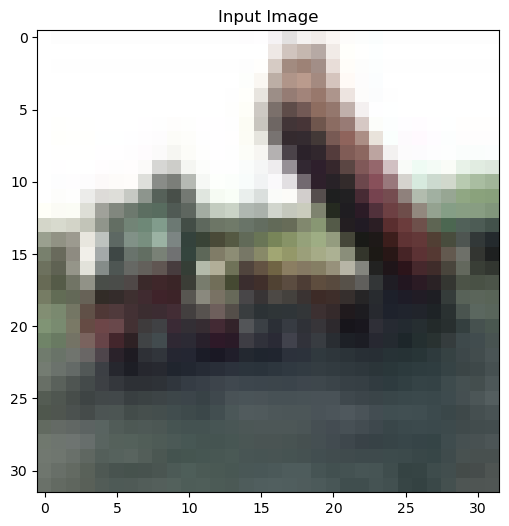

ValueError: num must be 1 <= num <= 64, not 65

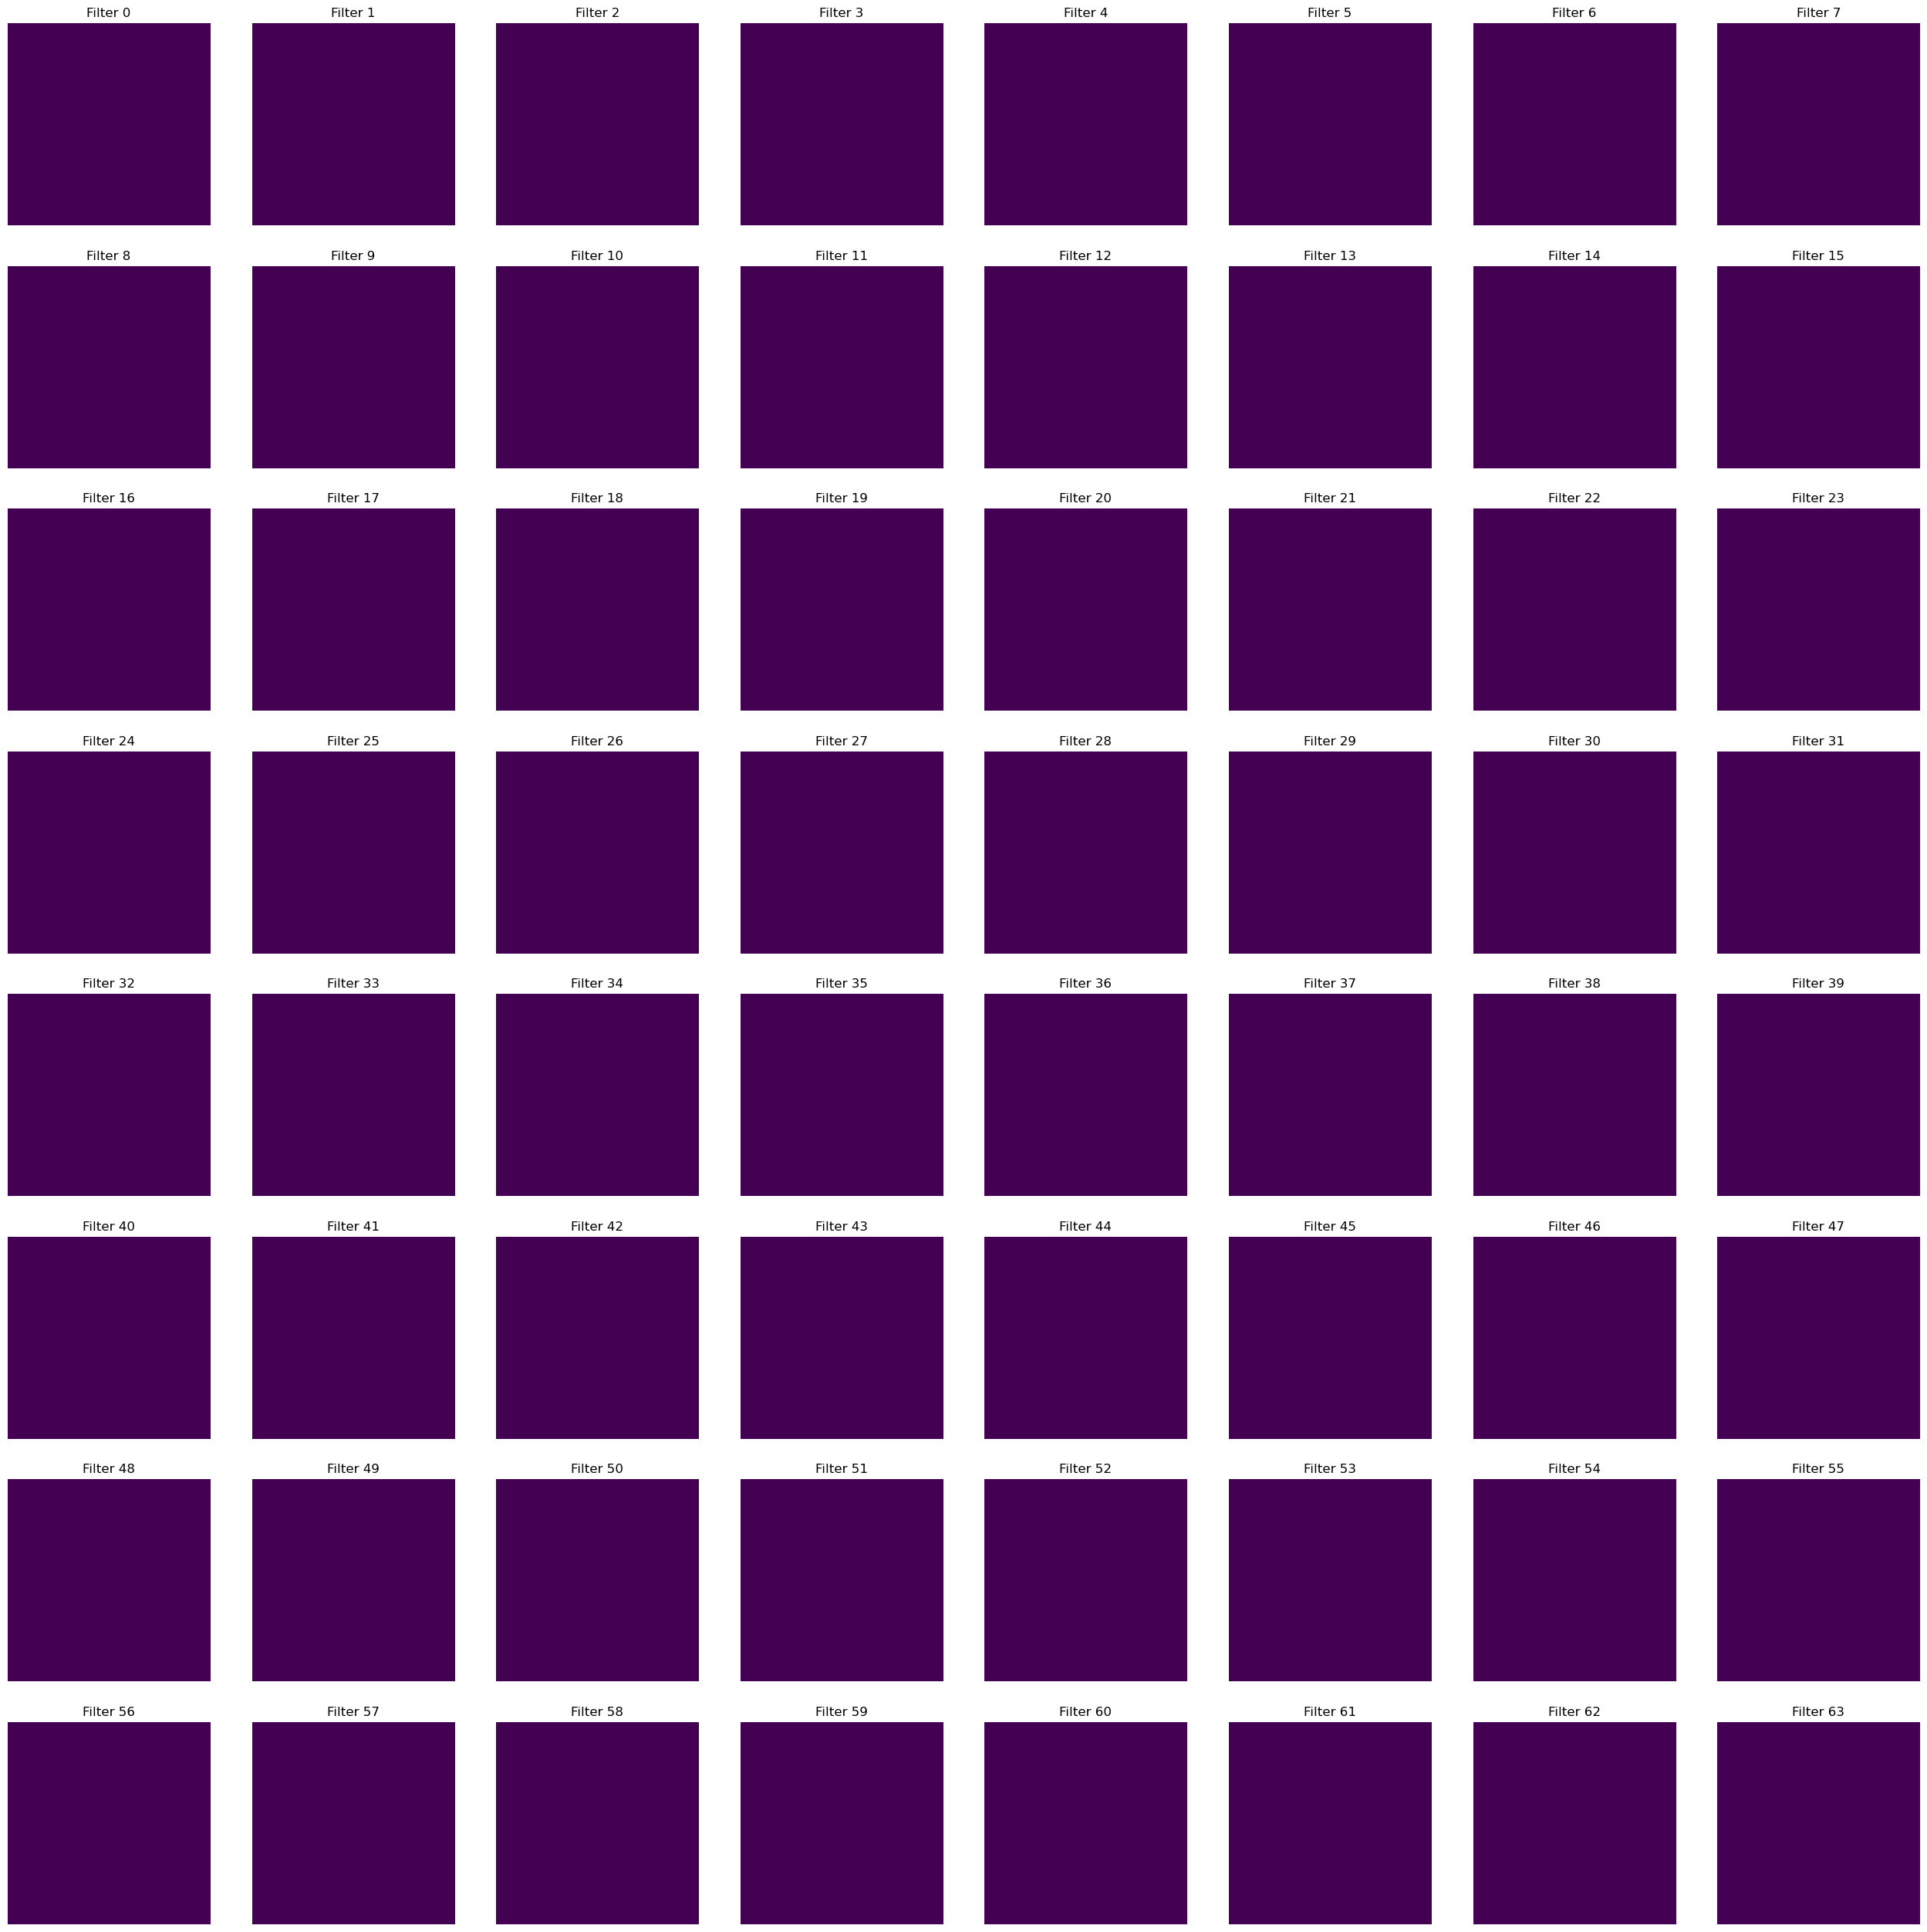

In [49]:
# Select a specific layer for visualization
layer_name = 'conv2d_17'
layer = model.get_layer(name=layer_name)
filter_index = 0  # You can change this to visualize different filters

# Create a sub-model to get the output of the selected layer
activation_model = models.Model(inputs=model.inputs, outputs=layer.output)

# Load an example image from CIFAR-10
img = train_images[2:3]

# Get the activation maps for the selected layer
activations = activation_model.predict(img)

# Visualize the input image
plt.figure(figsize=(6, 6))
plt.imshow(img[0])
plt.title('Input Image')
plt.show()

# Visualize the feature map
plt.figure(figsize=(32, 32))
for i in range(activations.shape[-1]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(activations[0, :, :, i])
    plt.axis('off')
    plt.title(f'Filter {i}')
plt.show()

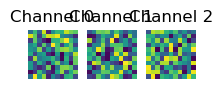

In [40]:
# Visualize a specific filter from the layer
filter_weights = layer.get_weights()[0][:, :, :, filter_index]
plt.figure(figsize=(6, 6))
for i in range(filter_weights.shape[-1]):
    plt.subplot(8, 8, i + 1)
    plt.imshow(filter_weights[:, :, i], cmap='viridis')
    plt.axis('off')
    plt.title(f'Channel {i}')
plt.show()